In [18]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Linear Regression
## 공부 시간에 따른 시험 점수

In [23]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
print(X)
print(y)

    hour
0    0.5
1    1.2
2    1.8
3    2.4
4    2.6
5    3.2
6    3.9
7    4.4
8    4.5
9    5.0
10   5.3
11   5.8
12   6.0
13   6.1
14   6.2
15   6.9
16   7.2
17   8.4
18   8.6
19  10.0
0      10
1       8
2      14
3      26
4      22
5      30
6      42
7      48
8      38
9      58
10     60
11     72
12     62
13     68
14     72
15     58
16     76
17     86
18     90
19    100
Name: score, dtype: int64


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

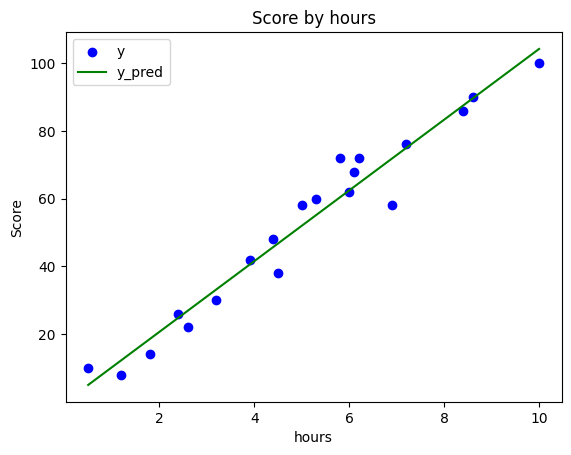

In [14]:
plt.scatter(X, y, color = 'b')
plt.plot(X, y_pred, color = 'g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(('y','y_pred'))
plt.show()

In [20]:
print('9시간 공부했을 때의 예상 점수: ', reg.predict([[9]]))

9시간 공부했을 때의 예상 점수:  [93.77478776]


In [21]:
reg.coef_  # 기울기 출력

array([10.44369694])

In [22]:
reg.intercept_  # y절편 출력

-0.218484702867201

y = 10.4436 X - 0.2184

## 데이터 세트 분리

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [27]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print(len(X))
print(len(X_train))
print(len(X_test))

20
16
4


In [30]:
print(len(y))
print(len(y_train))
print(len(y_test))

20
16
4


## 분리된 데이터를 통한 모델링

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [32]:
reg.fit(X_train, y_train)

LinearRegression()

## 데이터 시각화 (훈련세트)

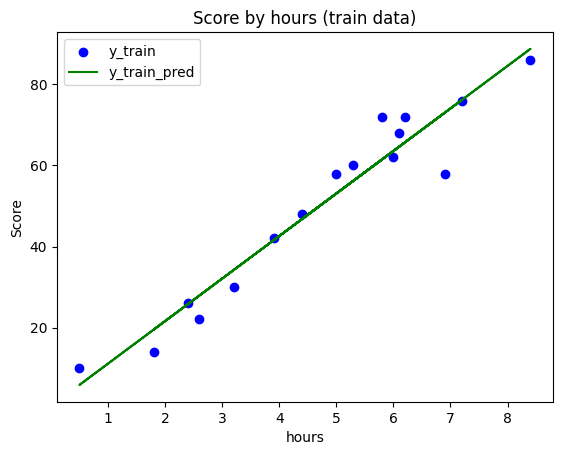

In [33]:
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, reg.predict(X_train), color = 'g')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(['y_train', 'y_train_pred'])
plt.show()

## 데이터 시각화 (테스트 세트)

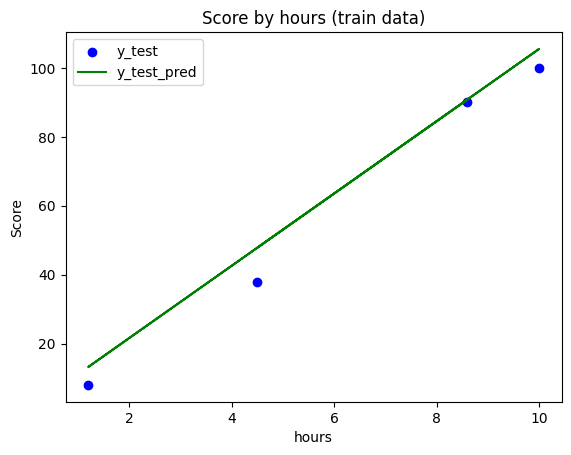

In [34]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, reg.predict(X_test), color = 'g')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(['y_test', 'y_test_pred'])
plt.show()

In [35]:
reg.coef_

array([10.49161294])

In [36]:
reg.intercept_

0.6115562905169796

## 모델 평가

In [37]:
reg.score(X_test, y_test)

0.9727616474310156

In [38]:
reg.score(X_train, y_train)

0.9356663661221668

## 경사하강법 (Gradient Descent)

    * max_iter: 훈련 세트 반복 횟수 (Epoch 횟수)
    * eta: 학습률 (learning rate)

In [39]:
from sklearn.linear_model import SGDRegressor

sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

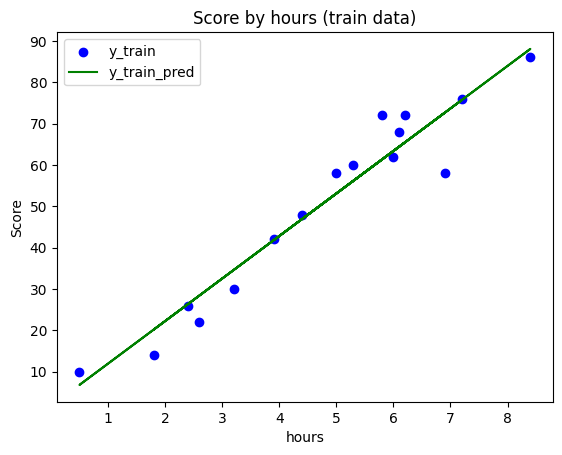

In [40]:
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, sr.predict(X_train), color = 'g')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(['y_train', 'y_train_pred'])
plt.show()

In [41]:
sr.coef_, sr.intercept_

(array([10.28435821]), array([1.66738106]))

In [42]:
sr.score(X_test, y_test)

0.9726587613385823

In [43]:
sr.score(X_train, y_train)

0.935290398923365